# GDP PER CAPITA

#### https://apps.bea.gov/itable/iTable.cfm?ReqID=70&step=1&acrdn=1#panel-6

### I was only able to find state gdp (current US dollars), this will be the work of dividing the GDP by the population of the state to get the value of GDP per capita

In [1]:
import pandas as pd
import numpy as np 
import plotly.express as px

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
co_df = pd.read_csv("../state_gdp/co_gdp.csv")
co_df

,GeoName,2014:Q1,2014:Q2,2014:Q3,2014:Q4,2015:Q1,2015:Q2,2015:Q3,2015:Q4,2016:Q1,2016:Q2,2016:Q3,2016:Q4,2017:Q1,2017:Q2,2017:Q3,2017:Q4,2018:Q1,2018:Q2,2018:Q3,2018:Q4,2019:Q1,2019:Q2,2019:Q3,2019:Q4,2020:Q1,2020:Q2,2020:Q3,2020:Q4,2021:Q1,2021:Q2,2021:Q3,2021:Q4,2022:Q1
0,Colorado,301806.8,307147.1,312328.2,316888.2,316793.3,320320.4,322179.3,323591.2,321951.2,326571.2,332515.8,338608.8,341554.9,344737.6,350959.8,358340,363869.5,369950.4,373225.5,378653,382449.7,390227.5,397140.6,399054.1,395421.1,358716.2,385075.1,391126.2,402761.3,417623.6,426477.5,440903.4,447519.9


In [3]:
co_df.drop(['GeoName'], axis=1, inplace=True)
co_df = co_df.T
# co_df

In [4]:
co_df.rename(columns = {0 : "gdp (current US dollars, millions)"}, inplace=True)

In [5]:
co_df.reset_index(inplace=True)
co_df.head()

,index,"gdp (current US dollars, millions)"
0,2014:Q1,301806.8
1,2014:Q2,307147.1
2,2014:Q3,312328.2
3,2014:Q4,316888.2
4,2015:Q1,316793.3


In [6]:
co_df.rename(columns={"index": "quarters"}, inplace=True)

In [7]:
gdp_values = co_df["gdp (current US dollars, millions)"].tolist()

## Create a function that will add the quarters together and then put them into a list 

In [8]:
def get_total():
    years_totals = []
    quarter_1 = 0
    quarter_2 = 1
    quarter_3 = 2
    quarter_4 =3
    count = 1
    while count <= 8:  
        total = gdp_values[quarter_1] + gdp_values[quarter_2] + gdp_values[quarter_3] + gdp_values[quarter_4]
        years_totals.append(total)
        
        quarter_1 += 4
        quarter_2 += 4
        quarter_3 += 4
        quarter_4 += 4
        count += 1
    return years_totals

In [9]:
totals = get_total()
totals

[1238170.2999999998,
 1282884.2,
 1319647.0,
 1395592.3,
 1485698.4,
 1568871.9,
 1530338.5999999999,
 1687765.7999999998]

In [10]:
data = {"year": [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
       "gdp": totals}
co_gdp_year = pd.DataFrame(data)
co_gdp_year

,year,gdp
0,2014,1238170.3
1,2015,1282884.2
2,2016,1319647.0
3,2017,1395592.3
4,2018,1485698.4
5,2019,1568871.9
6,2020,1530338.6
7,2021,1687765.8


 ## converting the from millions to the actual number 

In [31]:
gdp = co_gdp_year["gdp"].tolist()

In [32]:
def actual_total():
    gdp_total = []
    value = 0
    count = 1 
    while count <= 8:
        total = gdp[value]*1000000
        gdp_total.append(total)
        value += 1
        count += 1
    return gdp_total

In [34]:
act_gdp = actual_total()

In [35]:
data = {"year": [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
       "gdp": act_gdp}
co_gdp_year = pd.DataFrame(data)
co_gdp_year

,year,gdp
0,2014,1.238170e+12
1,2015,1.282884e+12
2,2016,1.319647e+12
3,2017,1.395592e+12
4,2018,1.485698e+12
5,2019,1.568872e+12
6,2020,1.530339e+12
7,2021,1.687766e+12


## import population data

In [15]:
pop_df = pd.read_csv("../state_pop/colorado_pop_cleaned.csv")
# pop_df

In [16]:
pop_df = pop_df.iloc[114:]
pop_df.head()

,year,colorado_pop
114,2014,5352.637
115,2015,5454.328
116,2016,5543.844
117,2017,5617.421
118,2018,5697.155


## covert the population to the out of the thousands 

In [36]:
colorado_pop = pop_df["colorado_pop"].tolist()

In [37]:
def actual_pop():
    pop_total = []
    value = 0
    count = 1 
    while count <= 8:
        total = colorado_pop[value]*1000
        pop_total.append(total)
        value += 1
        count += 1
    return pop_total

In [38]:
act_pop = actual_pop()

In [39]:
data = {"year": [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
       "population": act_pop}
co_pop_year = pd.DataFrame(data)
co_pop_year

,year,population
0,2014,5352637.0
1,2015,5454328.0
2,2016,5543844.0
3,2017,5617421.0
4,2018,5697155.0
5,2019,5758486.0
6,2020,5784308.0
7,2021,5812069.0


## Merge both DS

In [67]:
# need the population without the year column 
merged_df = pd.merge(co_gdp_year, co_pop_year, how="outer", on=["year"])
merged_df

,year,gdp,population
0,2014,1.238170e+12,5352637.0
1,2015,1.282884e+12,5454328.0
2,2016,1.319647e+12,5543844.0
3,2017,1.395592e+12,5617421.0
4,2018,1.485698e+12,5697155.0
5,2019,1.568872e+12,5758486.0
6,2020,1.530339e+12,5784308.0
7,2021,1.687766e+12,5812069.0


## Finding the GDP per captia of Colorado

In [75]:
# make lists from columns for population and gdp

population_list = merged_df.population.to_list()

gdp_list = merged_df.gdp.to_list()

per_capita_list = []

#function to divide gdp by population

def per_capita():

    for population, gdp in zip(population_list, gdp_list):

        per_capita_list.append((gdp/population))
        
    return per_capita_list

## insert per capita list as new column

In [76]:
per_capita_list = per_capita()

[231319.68411084102,
 235204.81349856482,
 238038.26370294692,
 248440.04036727885,
 260779.00285317848,
 272445.20521539863,
 264567.2740801492,
 290389.842240345]

In [77]:
capita_data = {"gdp_per_capita": per_capita_list}
capita_column = pd.DataFrame(capita_data)

In [79]:
merged_df.insert(3, "gdp_per_capita", capita_column, True)

In [113]:
merged_df = pd.DataFrame(merged_df)

# Adding marijuana tax 

In [86]:
co_mj_tax = pd.read_csv("../marijuana_tax/colorado_marijuana_cleaned.csv")
co_mj_tax = pd.DataFrame(co_mj_tax)
co_mj_tax.dropna()

,Revenue Month,Revenue Year,state_sales_ta_total,medical_marijuana,retail_marijuana,RMS_tax_total,RMS_local_government_distribution,RMS_retained_by_state_total,RMS_marijuana_tax_cash_fund,RMS_public_school_fund,RMS_general_fund,RME_tax_total,RME_public_school_capital_construction_assistance_fund,RME_public_school_fund,license_and_fees_total,total_taxes_and_fees
0,1,2014.0,$0,$0,$0,$0,$0,$0,$0,$0,$0,$0,$0,$0,$0,$0
1,2,2014.0,"$1,330,209","$913,519","$416,690","$1,401,568","$210,269","$1,191,534",$0,$0,$0,"$195,318","$195,286",$0,"$592,661","$3,519,755"
2,3,2014.0,"$1,460,429","$1,022,176","$438,253","$1,434,916","$212,674","$1,210,786",$0,$0,$0,"$339,615","$339,531",$0,"$857,615","$4,092,575"
3,4,2014.0,"$1,569,405","$999,900","$569,505","$1,898,685","$285,215","$1,613,861",$0,$0,$0,"$609,907","$609,887",$0,"$902,995","$4,980,992"
4,5,2014.0,"$1,559,710","$919,982","$639,728","$2,217,607","$330,057","$1,864,829",$0,$0,$0,"$734,351","$732,406",$0,"$761,687","$5,273,355"
5,6,2014.0,"$1,569,454","$927,330","$642,124","$2,070,577","$315,356","$1,787,025",$0,$0,$0,"$1,135,648","$1,135,718",$0,"$940,028","$5,715,707"
6,7,2014.0,"$1,530,968","$830,861","$700,107","$2,473,627","$368,231","$2,086,648",$0,$0,$0,"$969,637","$963,551",$0,"$1,547,853","$6,522,085"
7,8,2014.0,"$1,659,789","$838,711","$821,078","$2,970,183","$443,498","$2,513,164",$0,$0,$0,"$1,397,930","$1,399,496",$0,"$1,379,549","$7,407,450"
8,9,2014.0,"$1,892,780","$935,807","$956,973","$3,307,078","$496,211","$2,811,874",$0,$0,$0,"$1,464,796","$1,458,036",$0,"$1,076,513","$7,741,167"
9,10,2014.0,"$1,795,545","$908,630","$886,915","$2,940,346","$443,937","$2,515,663",$0,$0,$0,"$1,446,105","$1,454,528",$0,"$1,050,874","$7,232,870"


In [90]:
co_mj_tax = co_mj_tax.loc[{12, 25, 38, 51, 64, 77, 90, 103}]
# co_mj_tax

In [95]:
co_mj_tax = co_mj_tax.sort_index()
co_mj_tax

In [110]:
co_mj_tax = pd.DataFrame(co_mj_tax)
co_mj_tax = co_mj_tax.reset_index()
co_mj_tax

,index,Revenue Month,Revenue Year,state_sales_ta_total,medical_marijuana,retail_marijuana,RMS_tax_total,RMS_local_government_distribution,RMS_retained_by_state_total,RMS_marijuana_tax_cash_fund,RMS_public_school_fund,RMS_general_fund,RME_tax_total,RME_public_school_capital_construction_assistance_fund,RME_public_school_fund,license_and_fees_total,total_taxes_and_fees
0,12,whole_year,2014.0,"$17,834,802","$9,997,717","$7,837,085","$26,892,566","$4,005,458","$22,695,484",$0,$0,$0,"$11,375,268","$11,350,509",$0,"$11,491,686","$67,594,323"
1,25,whole_year,2015.0,"$26,968,987","$11,243,398","$15,725,588","$55,616,542","$8,237,905","$46,681,343",$0,$0,$0,"$33,417,832","$33,049,732",$0,"$14,407,812","$130,411,173"
2,38,whole_year,2016.0,"$36,448,955","$12,462,466","$23,986,489","$83,750,123","$12,636,490","$71,607,263",$0,$0,$0,"$59,420,537","$57,286,595","$2,450,958","$13,985,194","$193,604,810"
3,51,whole_year,2017.0,"$30,536,901","$11,857,911","$18,678,991","$131,512,817","$16,204,671","$115,574,067","$46,451,938","$18,199,333",$0,"$71,965,027","$40,256,542","$31,558,384","$13,353,728","$247,368,473"
4,64,whole_year,2018.0,"$10,828,237","$9,479,980","$1,348,257","$181,854,222","$18,190,808","$163,581,716","$117,533,463","$20,854,654","$25,193,599","$61,612,669","$33,052,463","$27,752,967","$12,234,509","$266,529,637"
5,77,whole_year,2019.0,"$11,234,906","$9,738,465","$1,496,441","$212,487,924","$21,205,609","$190,795,031","$137,086,230","$24,021,094","$29,687,707","$66,667,126","$61,626,623","$5,849,826","$12,068,469","$302,458,426"
6,90,whole_year,2020.0,"$13,858,886","$12,456,468","$1,402,419","$260,528,061","$26,071,623","$234,700,412","$168,632,246","$29,548,782","$36,519,384","$101,499,043","$83,807,805","$16,688,733","$11,594,120","$387,480,110"
7,103,whole_year,2021.0,"$14,531,331","$12,290,101","$2,241,230","$277,618,532","$27,751,724","$249,835,702","$179,506,952","$31,454,315","$38,874,435","$118,538,471","$55,483,720","$63,657,918","$12,797,719","$423,486,053"


## Merging the total taxes to the merged_df 

In [122]:
mj_tax_revenue = co_mj_tax["total_taxes_and_fees"]

In [123]:
merged_df = merged_df.join(mj_tax_revenue)
merged_df

,year,gdp,population,gdp_per_capita,total_taxes_and_fees
0,2014,1.238170e+12,5352637.0,231319.684111,"$67,594,323"
1,2015,1.282884e+12,5454328.0,235204.813499,"$130,411,173"
2,2016,1.319647e+12,5543844.0,238038.263703,"$193,604,810"
3,2017,1.395592e+12,5617421.0,248440.040367,"$247,368,473"
4,2018,1.485698e+12,5697155.0,260779.002853,"$266,529,637"
5,2019,1.568872e+12,5758486.0,272445.205215,"$302,458,426"
6,2020,1.530339e+12,5784308.0,264567.274080,"$387,480,110"
7,2021,1.687766e+12,5812069.0,290389.842240,"$423,486,053"


In [124]:
co_plot_df = merged_df.drop(columns=["gdp","population"])

In [129]:
co_plot_df = co_plot_df.rename(columns = {"total_taxes_and_fees":"mj_tax_revenue"})

In [132]:
co_plot_df.replace({'\$':'', '\,':'', '\(':'', '\)':''}, regex = True, inplace= True)
co_plot_df.head()

,year,gdp_per_capita,mj_tax_revenue
0,2014,231319.684111,67594323
1,2015,235204.813499,130411173
2,2016,238038.263703,193604810
3,2017,248440.040367,247368473
4,2018,260779.002853,266529637


In [133]:
co_plot_df['mj_tax_revenue'] = co_plot_df['mj_tax_revenue'].astype(str).astype(int)

In [135]:
co_plot_df

,year,gdp_per_capita,mj_tax_revenue
0,2014,231319.684111,67594323
1,2015,235204.813499,130411173
2,2016,238038.263703,193604810
3,2017,248440.040367,247368473
4,2018,260779.002853,266529637
5,2019,272445.205215,302458426
6,2020,264567.274080,387480110
7,2021,290389.842240,423486053


<AxesSubplot:xlabel='mj_tax_revenue', ylabel='gdp_per_capita'>

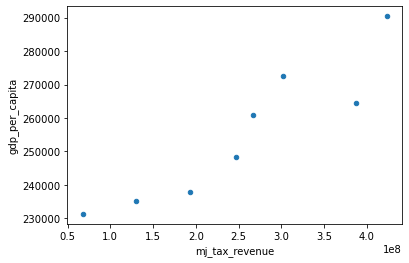

In [144]:
co_plot_df.plot.scatter(y="gdp_per_capita", x="mj_tax_revenue") 